<a href="https://colab.research.google.com/github/aaabduali/Facial-Emotion/blob/main/VGGFace_with_Undersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d 'msambare/fer2013'

 86% 52.0M/60.3M [00:00<00:00, 52.1MB/s]
100% 60.3M/60.3M [00:00<00:00, 103MB/s] 


In [3]:
import os
import zipfile

local_zip = '/content/fer2013.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir='/tmp/'

train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')

surprise_train_dir=os.path.join(train_dir,'surprise')
fear_train_dir=os.path.join(train_dir,'fear')
angry_train_dir=os.path.join(train_dir,'angry')
neutral_train_dir=os.path.join(train_dir,'neutral')
sad_train_dir=os.path.join(train_dir,'sad')
disgust_train_dir=os.path.join(train_dir,'disgust')
happy_train_dir=os.path.join(train_dir,'happy')

surprise_test_dir=os.path.join(test_dir,'surprise')
fear_test_dir=os.path.join(test_dir,'fear')
angry_test_dir=os.path.join(test_dir,'angry')
neutral_test_dir=os.path.join(test_dir,'neutral')
sad_test_dir=os.path.join(test_dir,'sad')
disgust_test_dir=os.path.join(test_dir,'disgust')
happy_test_dir=os.path.join(test_dir,'happy')

In [5]:
import shutil
shutil.rmtree(disgust_test_dir)
shutil.rmtree(disgust_train_dir)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train_happy_names = os.listdir(happy_train_dir)
print(train_happy_names[:10])

['Training_80039330.jpg', 'Training_28637944.jpg', 'Training_30138698.jpg', 'Training_26249029.jpg', 'Training_72995268.jpg', 'Training_80567356.jpg', 'Training_47178464.jpg', 'Training_44820215.jpg', 'Training_37894339.jpg', 'Training_72133442.jpg']


In [8]:
print("Total images in the training data with surprise label are: ",len(os.listdir(surprise_train_dir)))
print("Total images in the training data with fear label are: ",len(os.listdir(fear_train_dir)))
print("Total images in the training data with angry label are: ",len(os.listdir(angry_train_dir)))
print("Total images in the training data with neutral label are: ",len(os.listdir(neutral_train_dir)))
print("Total images in the training data with sad label are: ",len(os.listdir(sad_train_dir)))

print("Total images in the training data with happy label are: ",len(os.listdir(happy_train_dir)))


Total images in the training data with surprise label are:  3171
Total images in the training data with fear label are:  4097
Total images in the training data with angry label are:  3995
Total images in the training data with neutral label are:  4965
Total images in the training data with sad label are:  4830
Total images in the training data with happy label are:  7215


In [9]:
print("Total images in the test data with surprise label are: ",len(os.listdir(surprise_test_dir)))
print("Total images in the test data with fear label are: ",len(os.listdir(fear_test_dir)))
print("Total images in the test data with angry label are: ",len(os.listdir(angry_test_dir)))
print("Total images in the test data with neutral label are: ",len(os.listdir(neutral_test_dir)))
print("Total images in the test data with sad label are: ",len(os.listdir(sad_test_dir)))

print("Total images in the test data with happy label are: ",len(os.listdir(happy_test_dir)))

Total images in the test data with surprise label are:  831
Total images in the test data with fear label are:  1024
Total images in the test data with angry label are:  958
Total images in the test data with neutral label are:  1233
Total images in the test data with sad label are:  1247
Total images in the test data with happy label are:  1774


In [10]:
import tensorflow as tf

In [11]:
from random import sample

files = os.listdir(happy_train_dir)
for file in sample(files,3215):
    os.remove(os.path.join(happy_train_dir,file))

In [12]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.,rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
  
      fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1/255.,rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      
      fill_mode='nearest')

In [13]:
train_generator=train_datagen.flow_from_directory(
                                                  train_dir,
                                                  
                                                 batch_size=120,
                                                 class_mode='categorical',
                                                 
                                                 target_size=(224,224))
test_generator=test_datagen.flow_from_directory(test_dir,
                                                 batch_size=40,
                                                
                                                 class_mode='categorical',
                                                 target_size=(224,224))

Found 25058 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [14]:
!pip install keras_vggface keras_applications

     |████████████████████████████████| 51kB 6.5MB/s 


In [15]:
from keras_vggface.vggface import VGGFace
vgg_cnn=VGGFace(weights='vggface',include_top=False,input_shape=(224,224,3))
for layer in vgg_cnn.layers:
  layer.trainable=False

58925056/58909280 [==============================] - 1s 0us/step


In [18]:
model=tf.keras.models.Sequential()


model.add(vgg_cnn)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(6,activation='softmax'))

In [20]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

ValueError: ignored

In [22]:
checkpoint_path="/content/drive/MyDrive/checkpoints_under"


chk_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True,save_weights_only=True,verbose=1)

In [23]:
history=model.fit(train_generator,
                  steps_per_epoch=train_generator.samples/train_generator.batch_size ,
                  validation_data=test_generator,
                  validation_steps=test_generator.samples/test_generator.batch_size,
                  epochs=50,
                  callbacks=[chk_callback],
                  verbose=1
                  )

Epoch 1/50
208/208 [==============================] - 369s 2s/step - loss: 1.3593 - accuracy: 0.4603 - val_loss: 1.1361 - val_accuracy: 0.5620

Epoch 00001: val_loss improved from inf to 1.13606, saving model to /content/drive/MyDrive/checkpoints_under
Epoch 2/50
208/208 [==============================] - 323s 2s/step - loss: 1.2194 - accuracy: 0.5269 - val_loss: 1.0864 - val_accuracy: 0.5817

Epoch 00002: val_loss improved from 1.13606 to 1.08636, saving model to /content/drive/MyDrive/checkpoints_under
Epoch 3/50
208/208 [==============================] - 320s 2s/step - loss: 1.1731 - accuracy: 0.5460 - val_loss: 1.0640 - val_accuracy: 0.5905

Epoch 00003: val_loss improved from 1.08636 to 1.06399, saving model to /content/drive/MyDrive/checkpoints_under
Epoch 4/50
208/208 [==============================] - 319s 2s/step - loss: 1.1462 - accuracy: 0.5546 - val_loss: 1.0616 - val_accuracy: 0.5974

Epoch 00004: val_loss improved from 1.06399 to 1.06158, saving model to /content/drive/My

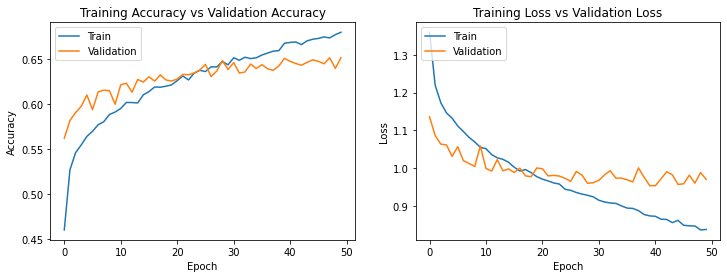

In [24]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()



---



In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
train_labels=train_generator.classes

In [ ]:
from keras.utils.np_utils import to_categorical
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=6)

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate( 
    test_generator, validation_labels, batch_size=batch_size,     verbose=1)

Confusion Matrix
[[ 630  412  620  886  860  587]
 [ 664  442  665  841  929  556]
 [ 619  444  653  843  880  561]
 [ 817  494  758 1058 1126  712]
 [ 768  517  776 1053 1042  674]
 [ 510  323  526  636  718  458]]
Classification Report
              precision    recall  f1-score   support

       angry       0.16      0.16      0.16      3995
        fear       0.17      0.11      0.13      4097
       happy       0.16      0.16      0.16      4000
     neutral       0.20      0.21      0.21      4965
         sad       0.19      0.22      0.20      4830
    surprise       0.13      0.14      0.14      3171

    accuracy                           0.17     25058
   macro avg       0.17      0.17      0.17     25058
weighted avg       0.17      0.17      0.17     25058



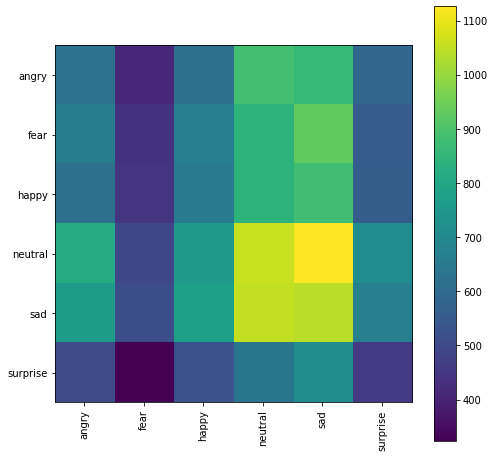

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_train = confusion_matrix(train_generator.classes, y_pred)

print('Confusion Matrix')
print(cm_train)

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

In [43]:
from mlxtend.plotting import plot_confusion_matrix

In [62]:
emotions = {0: 'Angry', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

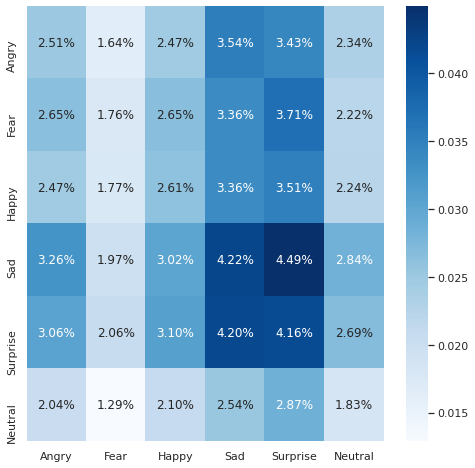

In [65]:
import seaborn as sns; sns.set()

plt.figure(figsize=(8,8))
sns.heatmap(cm_train/np.sum(cm_train), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=emotions.values(),yticklabels =emotions.values())

plt.show()